<a href="https://colab.research.google.com/github/megamindavi/pytorch_training/blob/main/Working_with_Images_%26_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]


(<PIL.Image.Image image mode=L size=28x28 at 0x7F74C92B88D0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 2


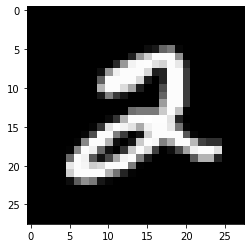

In [8]:
image, label = dataset[5]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [13]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


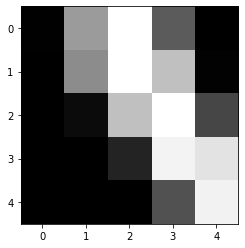

In [15]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [16]:
import numpy as np

In [17]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [19]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [20]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0109,  0.0043,  0.0051,  ...,  0.0136, -0.0074, -0.0118],
        [-0.0121, -0.0124, -0.0248,  ...,  0.0350, -0.0208,  0.0119],
        [ 0.0170, -0.0008, -0.0243,  ..., -0.0124,  0.0191,  0.0012],
        ...,
        [-0.0178, -0.0126,  0.0236,  ...,  0.0092, -0.0024, -0.0053],
        [ 0.0117,  0.0211, -0.0333,  ...,  0.0126,  0.0128, -0.0100],
        [ 0.0092, -0.0348, -0.0067,  ...,  0.0298,  0.0127, -0.0048]],
       requires_grad=True)

In [21]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0159, -0.0169,  0.0052,  0.0025, -0.0125,  0.0179, -0.0228,  0.0173,
         0.0171, -0.0097], requires_grad=True)

In [22]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([1, 3, 3, 0, 8, 7, 3, 1, 2, 4, 4, 2, 6, 6, 6, 8, 6, 2, 2, 9, 6, 2, 2, 4,
        2, 9, 9, 2, 5, 0, 2, 1, 0, 0, 3, 0, 7, 4, 3, 6, 6, 5, 6, 5, 0, 2, 9, 5,
        6, 3, 3, 4, 9, 1, 6, 7, 1, 4, 2, 6, 9, 8, 6, 2, 0, 0, 1, 3, 5, 7, 7, 9,
        6, 9, 5, 8, 7, 1, 6, 0, 3, 7, 1, 1, 4, 8, 6, 3, 3, 9, 3, 2, 5, 1, 3, 5,
        5, 2, 0, 8, 6, 4, 3, 1, 3, 8, 9, 5, 8, 1, 9, 7, 8, 5, 1, 0, 2, 4, 6, 3,
        9, 9, 4, 6, 0, 6, 6, 3])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [23]:
images.shape

torch.Size([128, 1, 28, 28])

In [24]:
images.reshape(128, 784).shape


torch.Size([128, 784])

In [25]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [26]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [27]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-3.0273e-02,  6.9591e-03,  7.0578e-03,  ..., -3.1393e-02,
           4.8717e-04, -5.0659e-03],
         [-2.6116e-02,  4.2693e-03, -1.7076e-02,  ...,  2.9882e-02,
          -2.0370e-02, -1.3242e-02],
         [-3.9419e-03, -4.8484e-03, -7.5775e-03,  ..., -1.9692e-02,
          -2.0727e-02,  3.1841e-02],
         ...,
         [-2.7447e-02, -3.3371e-02,  3.4480e-03,  ...,  2.4474e-02,
           3.4298e-02, -2.7901e-02],
         [-8.9833e-05,  1.6669e-02,  3.4621e-02,  ...,  2.9031e-03,
           9.5828e-03,  5.5446e-03],
         [ 2.0094e-02, -3.1551e-02,  1.2321e-02,  ..., -3.3645e-02,
          -2.6695e-02, -4.1332e-03]], requires_grad=True),
 Parameter containing:
 tensor([-0.0067,  0.0297,  0.0175,  0.0010, -0.0157,  0.0023,  0.0200, -0.0345,
          0.0341, -0.0240], requires_grad=True)]

In [28]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.2104,  0.0545,  0.1507,  0.1061, -0.0693, -0.0844,  0.2102,  0.1966,
         -0.0970, -0.0654],
        [-0.2085, -0.0390,  0.1897,  0.0593,  0.2230, -0.1623,  0.0878, -0.0660,
         -0.0215, -0.3806]])


In [29]:
import torch.nn.functional as F


In [30]:
outputs[:2]


tensor([[ 0.2104,  0.0545,  0.1507,  0.1061, -0.0693, -0.0844,  0.2102,  0.1966,
         -0.0970, -0.0654],
        [-0.2085, -0.0390,  0.1897,  0.0593,  0.2230, -0.1623,  0.0878, -0.0660,
         -0.0215, -0.3806]], grad_fn=<SliceBackward0>)

In [31]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1152, 0.0986, 0.1085, 0.1038, 0.0871, 0.0858, 0.1152, 0.1136, 0.0847,
         0.0874],
        [0.0826, 0.0978, 0.1229, 0.1079, 0.1271, 0.0865, 0.1110, 0.0952, 0.0995,
         0.0695]])
Sum:  1.0000001192092896


In [32]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 4, 2, 3, 2, 4, 7, 2, 6, 2, 3, 2, 2, 7, 0, 7, 0, 4, 2, 2, 6, 2, 6, 7,
        4, 6, 6, 4, 0, 7, 2, 6, 2, 4, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 4, 0, 3, 9,
        2, 6, 6, 6, 2, 2, 7, 5, 6, 0, 2, 2, 0, 4, 4, 4, 0, 2, 6, 2, 2, 2, 7, 2,
        6, 2, 2, 3, 2, 0, 3, 4, 5, 6, 2, 2, 7, 4, 2, 2, 2, 7, 4, 0, 3, 2, 2, 7,
        4, 7, 2, 3, 2, 2, 2, 4, 2, 0, 2, 2, 0, 2, 4, 2, 6, 6, 7, 7, 2, 7, 0, 6,
        2, 4, 0, 2, 7, 6, 7, 2])
tensor([0.1152, 0.1271, 0.1434, 0.1205, 0.1349, 0.1224, 0.1213, 0.1360, 0.1130,
        0.1244, 0.1232, 0.1244, 0.1182, 0.1216, 0.1281, 0.1225, 0.1299, 0.1314,
        0.1291, 0.1271, 0.1180, 0.1358, 0.1332, 0.1289, 0.1302, 0.1460, 0.1136,
        0.1281, 0.1344, 0.1261, 0.1366, 0.1191, 0.1196, 0.1217, 0.1322, 0.1455,
        0.1340, 0.1205, 0.1314, 0.1281, 0.1193, 0.1297, 0.1281, 0.1237, 0.1161,
        0.1235, 0.1471, 0.1108, 0.1347, 0.1270, 0.1294, 0.1286, 0.1164, 0.1562,
        0.1329, 0.1169, 0.1136, 0.1332, 0.1246, 0.1270, 0.1200, 0.1175, 0.1283,
       

In [33]:
labels

tensor([1, 9, 1, 4, 8, 7, 4, 3, 8, 9, 4, 7, 0, 1, 8, 2, 0, 7, 4, 4, 6, 3, 4, 4,
        6, 2, 0, 5, 8, 6, 7, 4, 3, 7, 1, 5, 1, 4, 1, 2, 9, 5, 5, 5, 3, 0, 0, 7,
        4, 0, 3, 4, 1, 7, 9, 6, 7, 8, 1, 1, 9, 9, 6, 5, 5, 5, 3, 3, 1, 7, 0, 1,
        3, 5, 5, 0, 1, 1, 2, 3, 4, 2, 5, 9, 1, 9, 6, 0, 4, 6, 3, 1, 9, 5, 4, 8,
        8, 8, 7, 8, 8, 3, 9, 7, 3, 0, 4, 5, 6, 9, 6, 7, 3, 0, 1, 1, 9, 1, 8, 8,
        5, 2, 9, 1, 6, 2, 4, 5])

In [34]:
torch.sum(preds == labels)

tensor(4)

In [35]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [36]:
accuracy(outputs, labels)

tensor(0.0312)

In [37]:
probs


tensor([[0.1152, 0.0986, 0.1085,  ..., 0.1136, 0.0847, 0.0874],
        [0.0826, 0.0978, 0.1229,  ..., 0.0952, 0.0995, 0.0695],
        [0.1089, 0.0923, 0.1434,  ..., 0.1285, 0.0891, 0.0874],
        ...,
        [0.0932, 0.1223, 0.0931,  ..., 0.1017, 0.0862, 0.0855],
        [0.1016, 0.0777, 0.1125,  ..., 0.1195, 0.0989, 0.0885],
        [0.1072, 0.0824, 0.1751,  ..., 0.1043, 0.0778, 0.0770]],
       grad_fn=<SoftmaxBackward0>)

In [38]:
outputs

tensor([[ 0.2104,  0.0545,  0.1507,  ...,  0.1966, -0.0970, -0.0654],
        [-0.2085, -0.0390,  0.1897,  ..., -0.0660, -0.0215, -0.3806],
        [ 0.0960, -0.0697,  0.3712,  ...,  0.2620, -0.1047, -0.1235],
        ...,
        [-0.0715,  0.1996, -0.0732,  ...,  0.0150, -0.1505, -0.1578],
        [-0.0316, -0.2997,  0.0700,  ...,  0.1305, -0.0586, -0.1701],
        [ 0.0824, -0.1811,  0.5733,  ...,  0.0553, -0.2384, -0.2489]],
       grad_fn=<AddmmBackward0>)

In [39]:
loss_fn = F.cross_entropy

In [40]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3382, grad_fn=<NllLossBackward0>)


In [41]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [42]:
l1 = [1, 2, 3, 4, 5]

In [43]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [44]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [45]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [46]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.18028084933757782, 'val_loss': 2.2901082038879395}

In [47]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9294, val_acc: 0.6255
Epoch [1], val_loss: 1.6669, val_acc: 0.7198
Epoch [2], val_loss: 1.4705, val_acc: 0.7621
Epoch [3], val_loss: 1.3218, val_acc: 0.7827
Epoch [4], val_loss: 1.2070, val_acc: 0.7979


In [48]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1165, val_acc: 0.8095
Epoch [1], val_loss: 1.0437, val_acc: 0.8183
Epoch [2], val_loss: 0.9840, val_acc: 0.8244
Epoch [3], val_loss: 0.9342, val_acc: 0.8305
Epoch [4], val_loss: 0.8920, val_acc: 0.8353
